In [1]:
import matplotlib.pyplot as plt
import numpy as np
from persim import plot_diagrams
from sklearn.decomposition import PCA
from ripser import ripser


class PhomPCA:
    def __init__(self, original_data):
        self.original_data = original_data
        self.n_points = original_data.shape[0]
        self.original_dim = original_data.shape[1]

        self.augmented_data = None
        self.reconstructed_data = None

        self.dgms = None
        self.dgms_reconstructed = None

    def embedding(self, N=20, noise=True, shuffle=False):
        # N: number of dimension to add
        if noise == True:
            noise_data = np.random.uniform(
                low=self.original_data.min(),
                high=self.original_data.max(),
                size=(self.n_points, N),
            )
            self.augmented_data = np.c_[self.original_data, noise_data]
        else:
            self.augmented_data = np.c_[
                self.original_data, np.zeros((self.n_points, N))
            ]

    def reconstruction(self, kernel=False):
        if kernel == False:
            from sklearn.decomposition import PCA

            pca = PCA(n_components=self.original_dim)
            self.reconstructed_data = pca.fit_transform(self.augmented_data)
        else:
            from sklearn.decomposition import KernelPCA

            kpca = KernelPCA(n_components=self.original_dim, kernel="rbf")
            self.reconstructed_data = kpca.fit_transform(self.augmented_data)

    def compute_pers_diag(self):
        self.dgms = ripser(self.original_data, maxdim=2)["dgms"]
        self.dgms_reconstructed = ripser(self.reconstructed_data, maxdim=2)["dgms"]

    def plot(self):
        if self.original_dim == 3:
            # Create a figure with three subplots arranged in a row
            fig, axes = plt.subplots(3, 2, figsize=(10, 10))

            # Plot the first diagram
            plot_diagrams(self.dgms, ax=axes[0, 0], plot_only=[0])
            axes[0, 0].set_title(r"$H_0$ original data")

            plot_diagrams(self.dgms_reconstructed, ax=axes[0, 1], plot_only=[0])
            axes[0, 1].set_title(r"$H_0$ recostructed data")

            # Plot the second diagram
            plot_diagrams(self.dgms, ax=axes[1, 0], plot_only=[1])
            axes[1, 0].set_title(r"$H_1$ original data")

            plot_diagrams(self.dgms_reconstructed, ax=axes[1, 1], plot_only=[1])
            axes[1, 1].set_title(r"$H_1$ recostructed data")

            # Plot the third diagram
            plot_diagrams(self.dgms, ax=axes[2, 0], plot_only=[2])
            axes[2, 0].set_title(r"$H_2$ original data")

            plot_diagrams(self.dgms_reconstructed, ax=axes[2, 1], plot_only=[2])
            axes[2, 1].set_title(r"$H_2$ recostructed data")

            # Adjust spacing between subplots
            plt.tight_layout()

            # plt.savefig(f"{directory}_{regularization}")
            # Display the plot
            plt.show()
        elif self.original_dim == 2:
            # Create a figure with three subplots arranged in a row
            fig, axes = plt.subplots(2, 2, figsize=(10, 10))

            # Plot the first diagram
            plot_diagrams(self.dgms, ax=axes[0, 0], plot_only=[0])
            axes[0, 0].set_title(r"$H_0$ original data")

            plot_diagrams(self.dgms_reconstructed, ax=axes[0, 1], plot_only=[0])
            axes[0, 1].set_title(r"$H_0$ recostructed data")

            # Plot the second diagram
            plot_diagrams(self.dgms, ax=axes[1, 0], plot_only=[1])
            axes[1, 0].set_title(r"$H_1$ original data")

            plot_diagrams(self.dgms_reconstructed, ax=axes[1, 1], plot_only=[1])
            axes[1, 1].set_title(r"$H_1$ recostructed data")

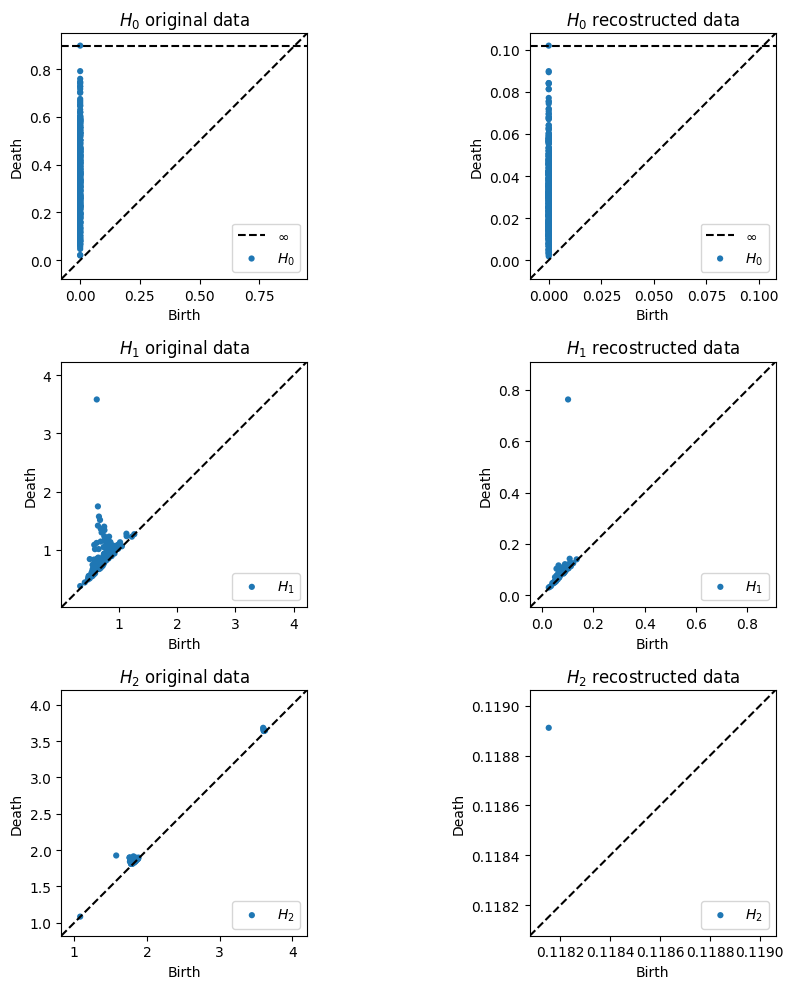

In [17]:
from shapes import torus

data = torus(400)

pers = PhomPCA(data)
pers.embedding(1, noise=False)
pers.reconstruction(kernel=True)
pers.compute_pers_diag()
pers.plot()

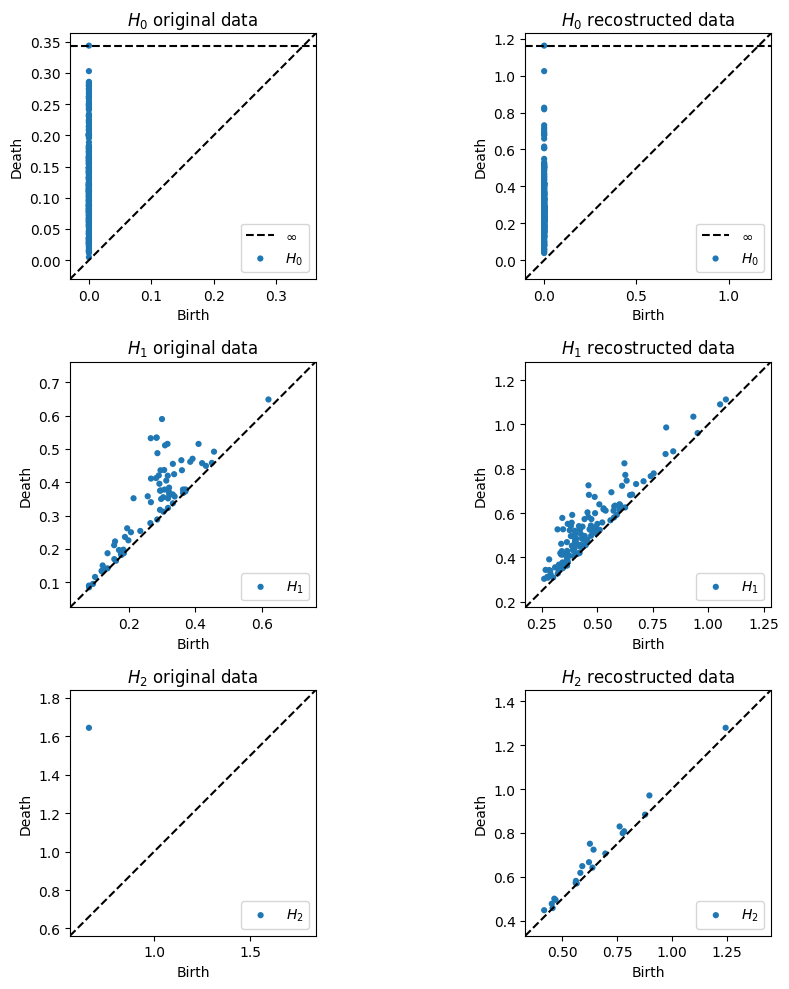

In [3]:
from shapes import sphere

data = sphere(300)

pers = PhomPCA(data)
pers.embedding(20)
pers.reconstruction()
pers.compute_pers_diag()
pers.plot()

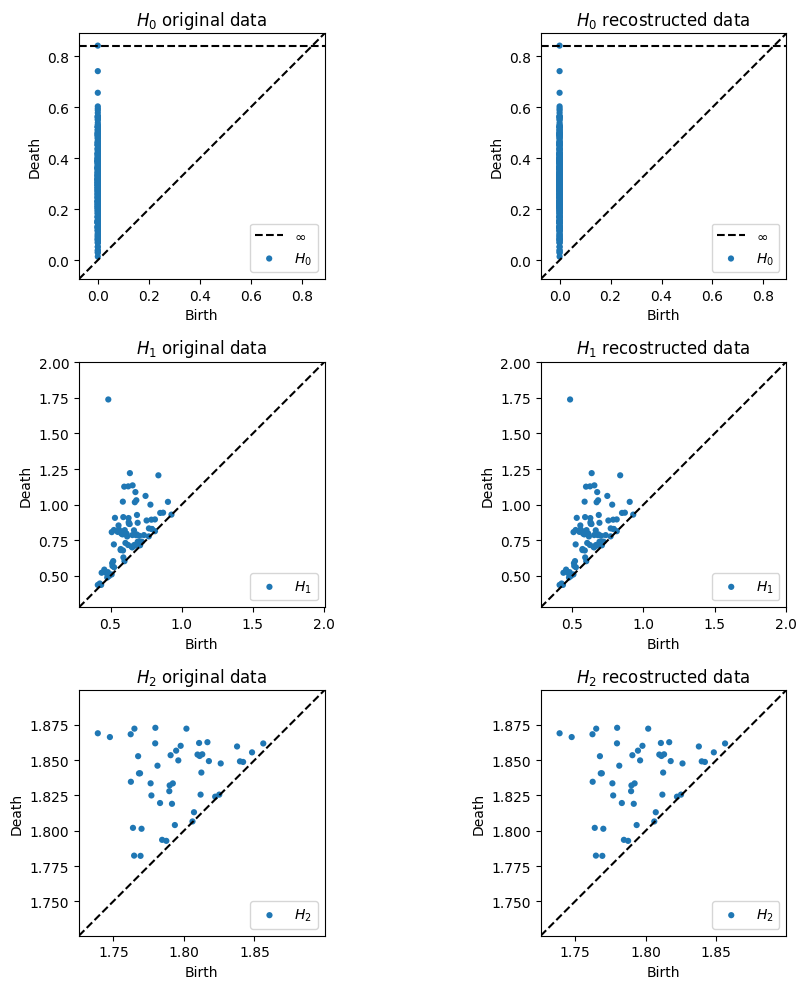

In [6]:
from shapes import cylinder

data = cylinder(300)

pers = PhomPCA(data)
pers.embedding(20, noise=False)
pers.reconstruction()
pers.compute_pers_diag()
pers.plot()

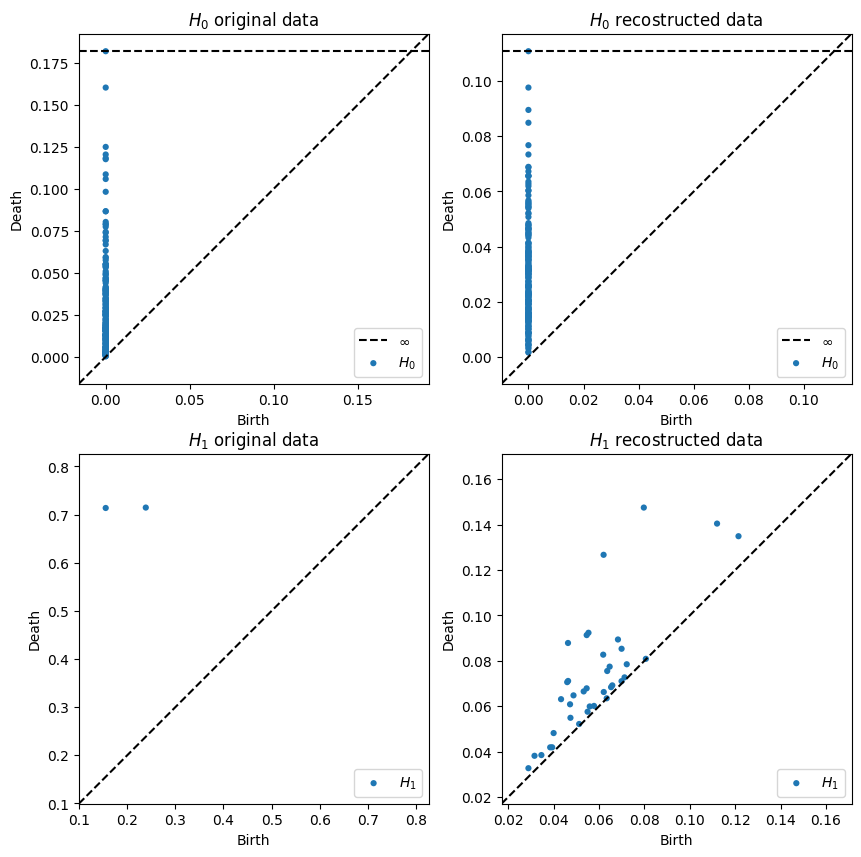

In [3]:
# generate some 2D data
from shapes import eight

data = eight(n=200)
# plt.scatter(data[:, 0], data[:, 1])

pers = PhomPCA(data)
pers.embedding(20, noise=True)
pers.reconstruction(kernel=True)
pers.compute_pers_diag()
pers.plot()

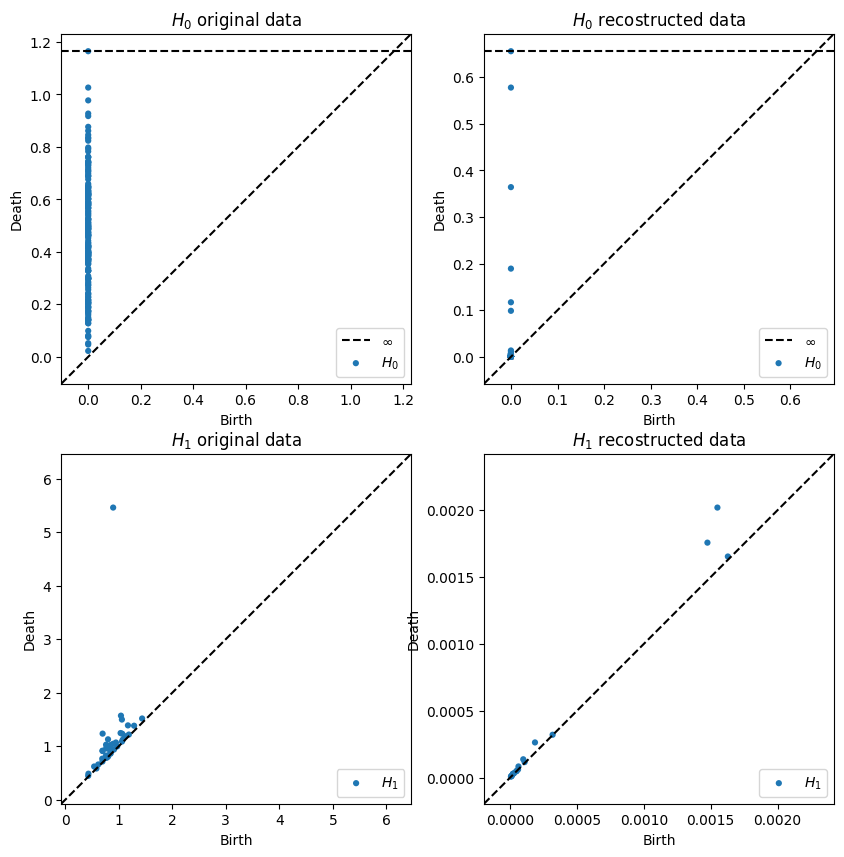

In [4]:
# generate some 2D data
from shapes import circle

data = circle(n=200)
# plt.scatter(data[:, 0], data[:, 1])

pers = PhomPCA(data)
pers.embedding(20, noise=True)
pers.reconstruction(kernel=True)
pers.compute_pers_diag()
pers.plot()